# MRT/MTF from fraction of DSTs remaining since time of death

- This mean residecne time is a weighted mean of the mean time since death ($t_d$ or x):
$$
MRT = \frac{  \sum_{i=0}^{n-1} \left[ td_{i}*(f_{i}-f_{i-1}) \right]  }{\sum_{i=0}^{n-1} (f_{i}-f_{i-1})},
$$ 
where $i$ is the *i*th measurement interval, *n* is the number of measurements, *f* is the fraction od dead standing trees remaining at time $t_d$

- Only works well if the step sizes are small $\rightarrow$ interpolations necessary

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from scipy.interpolate import interp1d
import sys
from classes import boundaries as bd
from classes import functions as fcy
from classes import snag_MTF_func as sg

plot_setup = bd.plot_setup()
params = {'mathtext.default':'regular'}
plt.rcParams.update(params)

%matplotlib inline

# Figure A2

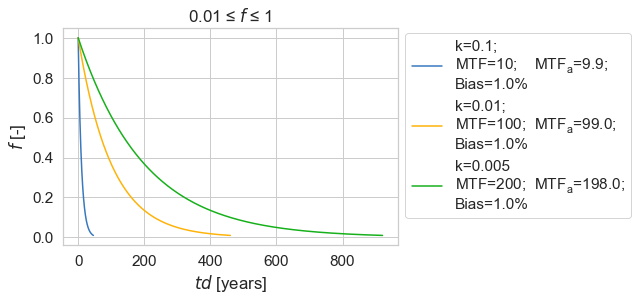

In [5]:
def func(x,k):
    return np.exp(-k*x)

rates = [0.1,0.01,0.005]

dt = 0.01

MTF_label = [';\nMTF=',';\nMTF=','\nMTF=']
MTFa_label = ['   $MTF_a$=',' $MTF_a$=',' $MTF_a$=']
err_label =['\nBias=','\nBias=','\nBias=']
for r,rate in enumerate(rates):
    x = np.arange(0,5/rate,dt)
    y = func(x,rate)

    ys = y
    xs = x
    ys[ys < 0.01] = np.nan
    xs = xs[~np.isnan(ys)]
    ys = ys[~np.isnan(ys)]
    y = y[~np.isnan(y)]
    yy = ys[:-1]-ys[1:]
    
    approximated_using1prc = round(sum(yy*xs[1:])/sum(yy),1)
    approximated_using1prc = round(sum(y*dt),1)
    err_prc = round((1-approximated_using1prc/(1/rate))*100,1)

    plt.plot(xs, ys, 
                label=('k='+str(rate)+MTF_label[r]+str(int(1/rate))+'; '+MTFa_label[r]+
                       str(approximated_using1prc)+';'+err_label[r]+str(err_prc)+'%')
               )
    plt.xlabel('$\it{td}$ [years]')
    plt.ylabel('$\it{f}$ [-]')
plt.legend(bbox_to_anchor=(1,1.01),loc='upper left')
plt.title(r'0.01 ≤ $\it{f}$ ≤ 1')
plt.savefig('Appendix_FigureA2_Bias_assume_1prc_remain_when_all_gone.png',dpi=300, bbox_inches='tight')
plt.show()

# Figure A2

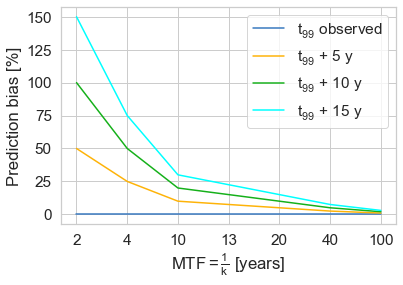

In [4]:
rates = [0.5,0.25,0.1,0.075,0.05,0.025,0.01]


MRT_list = [1/r for r in rates]
t_99     = [5/r for r in rates]
t_95     = [3/r for r in rates]


x        = np.arange(0,len(rates))
arr      = np.empty((6,len(rates)))
arr[0,:] = MRT_list

fig, ax = plt.subplots(1,1)
for t,tsd in enumerate(rates):

    arr[1,t] = 1/(5/t_99[t])
    arr[2,t] = 1/(5/(t_99[t]+5))
    arr[3,t] = 1/(5/(t_99[t]+10))
    arr[4,t] = 1/(5/(t_99[t]+15))
    arr[5,t] = 1/(5/(t_99[t]+25))


plt.plot(np.arange(0,(len(rates))), abs(arr[0]-arr[1])/arr[0]*100, label='$t_{99}$ observed')
plt.plot(np.arange(0,(len(rates))), abs(arr[0]-arr[2])/arr[0]*100, label='$t_{99}$ + 5 y')
plt.plot(np.arange(0,(len(rates))), abs(arr[0]-arr[3])/arr[0]*100, label='$t_{99}$ + 10 y')
plt.plot(np.arange(0,(len(rates))), abs(arr[0]-arr[4])/arr[0]*100, label='$t_{99}$ + 15 y')


plt.ylabel('Prediction bias [%]')
plt.xlabel(r'$MTF=\frac{1}{k}$ [years]')
ticks = ax.get_xticks()
plt.legend(bbox_to_anchor=(1,1))
ax.set_xticks(x, [str(int(1/r)) for r in rates])
#plt.xticks(rotation=45, ha='right')
plt.savefig('Appendix_FigureA3_t99.png',dpi=300, bbox_inches='tight')
plt.show()    